In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class BorderEquation:
	def __init__(self) -> None:
		# alpha1 * y(a) + beta1 * y'(a) = C1
		# alpha2 * y(b) + beta2 * y'(b) = C2
		self.alpha1 = 1
		self.beta1 = 0.
		self.C1 = 0.
		self.alpha2 = 1
		self.beta2 = 0.
		self.C2 = 0.

		self.px = lambda x: 0.
		self.qx = lambda x: 0.
		self.fx = lambda x: np.cos(x)

		self.a = -np.pi / 2
		self.b = np.pi / 2

		self.exact = lambda x: (self.C1 + self.C2) / 2 + x * (self.C2 - self.C1) / np.pi - np.cos(x)

![title](img/explanation.png)
![title](img/sweep_method_scheme.png)

In [3]:
def Ai(equation, xi, h):
	return 1.0 / (h ** 2) - equation.px(xi) / (2.0 * h)


def Bi(equation, xi, h):
	return 2.0 / (h ** 2) - equation.qx(xi)


def Ci(equation, xi, h):
	return 1.0 / (h ** 2) + equation.px(xi) / (2.0 * h)


def Fi(equation, xi):
	return equation.fx(xi)


def solve(equation, n: int):
	h = (equation.b - equation.a) / n

	alpha = list()
	beta = list()

	alpha.append(-equation.beta1 / (equation.alpha1 * h - equation.beta1))
	beta.append(equation.C1 * h / (equation.alpha1 * h - equation.beta1))
	# https://ru.wikipedia.org/wiki/Метод_прогонки
	for i in range(1, n):
		xi = equation.a + i * h
		alpha_prev = alpha[len(alpha) - 1]
		beta_prev = beta[len(beta) - 1]

		alpha_i = Ci(equation, xi, h) / (Bi(equation, xi, h) - Ai(equation, xi, h) * alpha_prev)

		beta_i = (beta_prev * Ai(equation, xi, h) - Fi(equation, xi)) / (
					Bi(equation, xi, h) - Ai(equation, xi, h) * alpha_prev)

		alpha.append(alpha_i)
		beta.append(beta_i)

	result = np.zeros(int(n) + 1)
	output = list()
	yn = (equation.beta2 * beta[len(beta) - 1] + equation.C2 * h) / (
				equation.beta2 * (1 - alpha[len(alpha) - 1]) + equation.alpha2 * h)
	result[n] = yn
	output.append((equation.a + n * h, yn))
	for i in reversed(range(1, n + 1)):
		result[i - 1] = result[i] * alpha[i - 1] + beta[i - 1]
		xi = equation.a + (i - 1) * h

		output.append((xi, result[i - 1]))
	return output

In [4]:
def run_task(a, b, n=10, A=0, B=0):
	equation = BorderEquation()
	equation.a = a
	equation.b = b
	equation.C1 = A
	equation.C2 = B
	result = solve(equation, n)
	x_dimension = list()
	y_dimension = list()
	error_list = list()
	for i in range(len(result)):
		x_dimension.append(result[i][0])
		y_dimension.append(result[i][1])
		error_list.append(np.abs(result[i][1] - equation.exact(result[i][0])))

	fig, ax = plt.subplots(2, 1, figsize=(5, 7.5), dpi=100)
	ax[0].plot(x_dimension, y_dimension, label="solution")
	ax[0].set_title("Solution")
	ax[0].legend()
	ax[1].plot(x_dimension, error_list, label="precision")
	ax[1].set_title("Error")
	ax[1].legend()

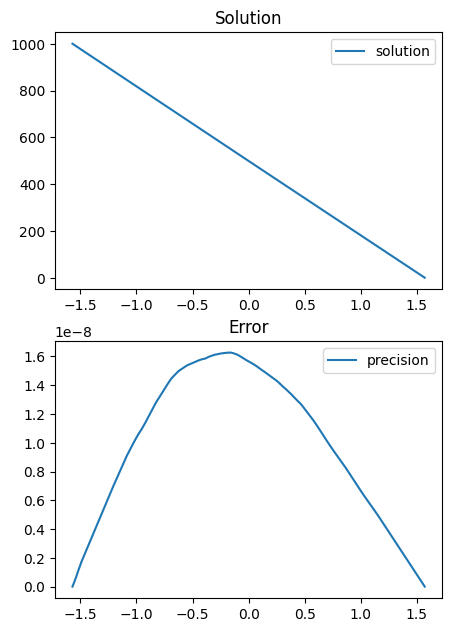

In [15]:
run_task(a=-np.pi / 2, b=np.pi / 2, n=10000, A=1000, B=0)
# почему такая форма ошибки